In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('spam.csv',encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['v1']=le.fit_transform(df['v1'])
df.head()

# 0=> Ham
# 1=> Spam

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(max_features=3000)
x=tfid.fit_transform(df['v2']).toarray()
y=df['v1']


In [8]:
from sklearn.model_selection import train_test_split

In [9]:

x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179, 3000)
(1393, 3000)
(4179,)
(1393,)


In [10]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9813352476669059
[[1193    3]
 [  23  174]]
0.9830508474576272


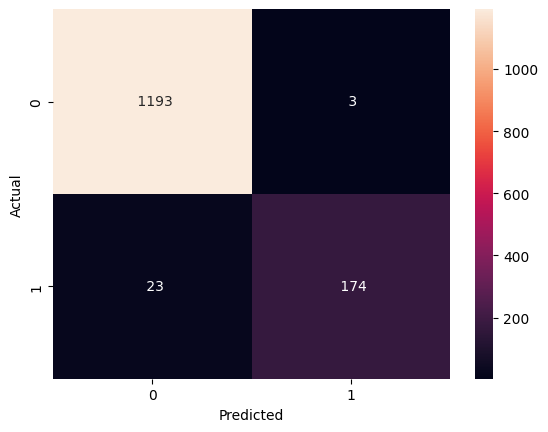

In [11]:


# Your labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Reshape the labels into a 2x2 matrix
labels = np.asarray(labels).reshape(2, 2)

# Calculate the confusion matrix
cf = confusion_matrix(y_test, y_pred)

# Create a Seaborn heatmap with labels and values
sns.heatmap(cf, annot=True, fmt=' ')

# Set the axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
inp=['ree entry in 2 a wkly comp to win FA Cup fina']
x_inp1=tfid.transform(inp).toarray()
print(bnb.predict(x_inp1))

[1]
